For my final project, I am analyzing movie data. In this notebook, I have collected a movie dataset from Kaggle. I imported the data from a csv file and made additional dataframes to help further my analysis. The dataset includes important features that will contribute to my final analysis. Some of these features include popularity, budget, runtime, genre, release date, revenue, directors, and cast. In this dataset, there are 10,866 movies which were released in the years 1966-2015. 


Movie data can be analyzed in many different ways. In my analysis, I want to see which variables have the greatest affect on popularity level. In this dataset, I have cleaned the data to eliminate any columns that are unnecessary for my analysis. I have narrowed the columns down to popularity, budget,	revenue, cast, director, runtime, genres, production companies,	release date, vote count, vote average, release year, budget, and revenue. These are the variables that will help answer questions about movie data that I have provided below. 



#### Do higher-budget films generally receive better ratings?

#### Is there a correlation between the duration of a movie and its rating? 

#### Are there trends in ratings based on the month or season of a movie's release?

#### Are there specific directors or actors whose movies tend to receive higher ratings?



The columns I have eliminated are id, imbd id, homepage, tagline, overview, and keywords. These variables do not hold any information that would be beneficial in my overall analysis. To make the data easier to read, I removed unnecessary columns. 

In [97]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import requests 
import base64
import urllib 

In [98]:
tmbd_movie_data = pd.read_csv('tmdb_movies_data.csv')

In [99]:
tmbd_movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [100]:
tmbd_movie_data.keys()

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

tmbd_movie_data['release_date'] = pd.to_datetime(tmbd_movie_data['release_date'])

tmbd_movie_data['release_date'].head()

In [101]:
all_movies_df = pd.DataFrame(tmbd_movie_data)

In [102]:
all_movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [103]:
all_movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [104]:
clean_all_movies_df = all_movies_df.drop(columns= ['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords'])

In [105]:
clean_all_movies_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In the dataframe above, I cleaned the dataframe by removing columns that are not necessary for my analysis. I kept the columns that I believe will help my analysis the best. 

In [106]:
name_group = clean_all_movies_df.groupby('original_title').sum()

In [108]:
name_group.head()

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,
$5 a Day,0.298961,0,0,Christopher Walken|Alessandro Nivola|Sharon St...,Nigel Cole,98,Drama|Comedy,New Line Cinema,1/1/2008,12,5.4,2008,0.000,0.000000e+00
$9.99,0.204302,0,0,Tom Budge|Josef Ber|Joel Edgerton|Leon Ford|Sa...,Tatia Rosenthal,78,Animation|Drama,Australian Film Finance Corporation,9/4/2008,18,6.1,2008,0.000,0.000000e+00
'71,1.220073,0,1625847,Jack O'Connell|Paul Anderson|Sean Harris|Sam R...,Yann Demange,99,Thriller|Action|Drama|War,Screen Yorkshire|British Film Institute (BFI)|...,10/10/2014,274,6.6,2014,0.000,1.497553e+06
(500) Days of Summer,3.244139,7500000,60722734,Joseph Gordon-Levitt|Zooey Deschanel|ChloÃ« Gr...,Marc Webb,95,Comedy|Drama|Romance,Fox Searchlight Pictures|Watermark|Dune Entert...,7/17/2009,1778,7.3,2009,7623003.256,6.171861e+07
(T)Raumschiff Surprise - Periode 1,0.712887,0,0,Michael Herbig|Rick Kavanian|Christian Tramitz...,Michael Herbig,87,Comedy|Science Fiction,herbX film GmbH,7/14/2004,80,6.3,2004,0.000,0.000000e+00


The dataframe above shows grouping the data by Movie Title.

In [109]:
popular_sorted_df = name_group.sort_values(by ='popularity', ascending= False)

In [110]:
popular_sorted_df.head()

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,
Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
Mad Max: Fury Road,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
Interstellar,24.949134,165000000,621752480,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/2014,6498,8.0,2014,151980023.4,5.726906e+08
Guardians of the Galaxy,14.311205,170000000,773312399,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/2014,5612,7.9,2014,156585478.6,7.122911e+08
Insurgent,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


The above dataframe is sorted by most popular to least popular. 

I could not figure out how to add the code below without it affecting all of my dataframes. 



tmbd_movie_data['release_date'] = pd.to_datetime(tmbd_movie_data['release_date'])
tmbd_movie_data['release_date'].head()

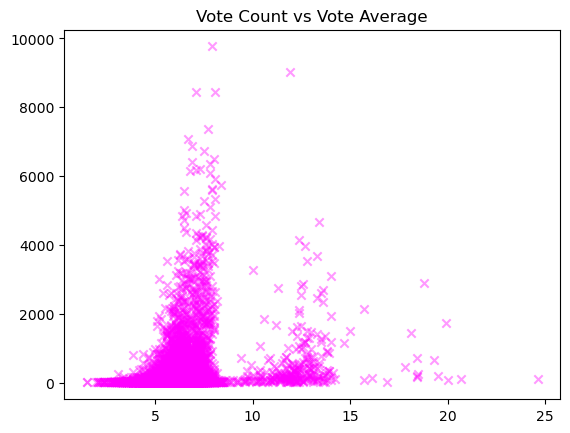

In [128]:
fig1, ax1 = plt.subplots()
ax1.scatter(x = popular_sorted_df['vote_average'], 
            y = popular_sorted_df['vote_count'],
           color = 'magenta', 
           marker = 'x', 
           alpha = .4)

ax1.set_title('Vote Count vs Vote Average')
plt.show()


The scatterplot above shows vote average vs vote count. The scatterplot includes over 10,000 movies. In my next update I will condense the number of movies in the graphs. 

The majority of movies have a vote average between 2 and 10 with the average number of votes being from 0-2000. 